In [ ]:
python main.py --model WGAN-GP \
               --is_train True \
               --dataroot "../datasets/JSRTcomb" \
               --dataset JSRT \
               --generator_iters 40000 \
               --cuda True \
               --batch_size 64

In [3]:
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torch.utils.data as data_utils
from PIL import Image
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import torch
import numpy as np 



/root/miniconda3/envs/myenv/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [204]:
maskpath = "../datasets/JSRT/Masks/"
imgpath = "../datasets/JSRT/Images/"
combpath = "../datasets/JSRTcomb/comb/"
# path = "../datasets/JSRTogMasks/"

for imgname in tqdm(os.listdir(maskpath)):
    # print(imgname)
    msk = Image.open(maskpath + imgname)
    mask = np.expand_dims(np.array(msk)*255, axis = 2)
    image = Image.open(imgpath + imgname)
    img = np.expand_dims(np.array(image), axis = 2)
    tmp = np.zeros_like(img)
    # print(mask.dtype, img.dtype, tmp.shape, tmp.dtype, tmp)
    comb = np.concatenate((img, mask, tmp), axis = 2)
    
    # print(comb.dtype, comb.shape)
    comb = Image.fromarray(comb)
    comb.save(combpath + imgname)
    # break

100%|██████████| 247/247 [00:57<00:00,  4.30it/s]


In [24]:
img.shape

(256, 256, 3)

In [8]:
im = Image.fromarray(img[:,:,1][2:66, 2:66])
im.show()

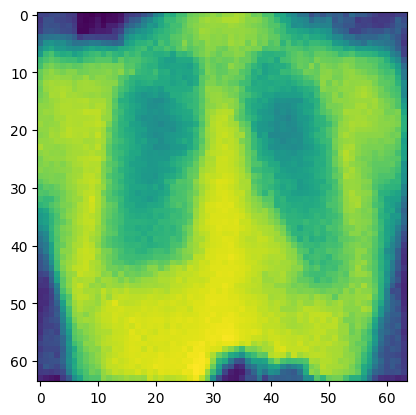

In [17]:
img = mpimg.imread("/root/training_result_images/img_generatori_iter_7455.png")
imgplot = plt.imshow(img[:,:,0][2:66, 2:66])
plt.show()

In [205]:
# We can use an image folder dataset the way we have it setup.
# Create the dataset

image_size = 256
bs = 32
ngpu = 1
dataroot = "../datasets/JSRTcomb"


dataset = dset.ImageFolder(root=dataroot,
                           transform=transforms.Compose([
                               transforms.Resize(image_size),
                               transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
                           ]))
# Create the dataloader
dataloader = torch.utils.data.DataLoader(dataset, batch_size=bs,shuffle=True)

# Decide which device we want to run on
device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")